In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Analyzing Best-Seller Trends Across Product Categories

### Objective: Understand the relationship between product categories and their best-seller status.

In [ ]:
#Create a crosstab between the product category and the isBestSeller status.

In [23]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [24]:
#Are there categories where being a best-seller is more prevalent?

#Hint: one option is to calculate the proportion of best-sellers for each category 
#and then sort the categories based on this proportion in descending order.

In [25]:
crosstab_result['BestSellerProportion'] = (crosstab_result[True] / (crosstab_result[True] + crosstab_result[False]))*100



In [26]:
sorted_categories = crosstab_result.sort_values(by='BestSellerProportion', ascending=False)


In [27]:
print(sorted_categories[['BestSellerProportion']])

isBestSeller                      BestSellerProportion
category                                              
Grocery                                       5.813467
Smart Home Security & Lighting                5.769231
Health & Personal Care                        5.768628
Mobile Phone Accessories                      4.247104
Power & Hand Tools                            3.533895
...                                                ...
CD, Disc & Tape Players                       0.000000
General Music-Making Accessories              0.000000
Snowboard Boots                               0.000000
Boxes & Organisers                            0.000000
eBook Readers & Accessories                   0.000000

[296 rows x 1 columns]


The below categories appears to have highest proportion
- Grocery                                       5.813467
- Smart Home Security & Lighting                5.769231
- Health & Personal Care                        5.768628

In [28]:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(50603.56501614783, 0.0)

In [29]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats.contingency import association

crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

# Now, compute Cramér's V for the 'crosstab_result'
cramers_v = association(crosstab_result, method="cramer")

print(cramers_v)


0.1222829439760564


In [30]:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

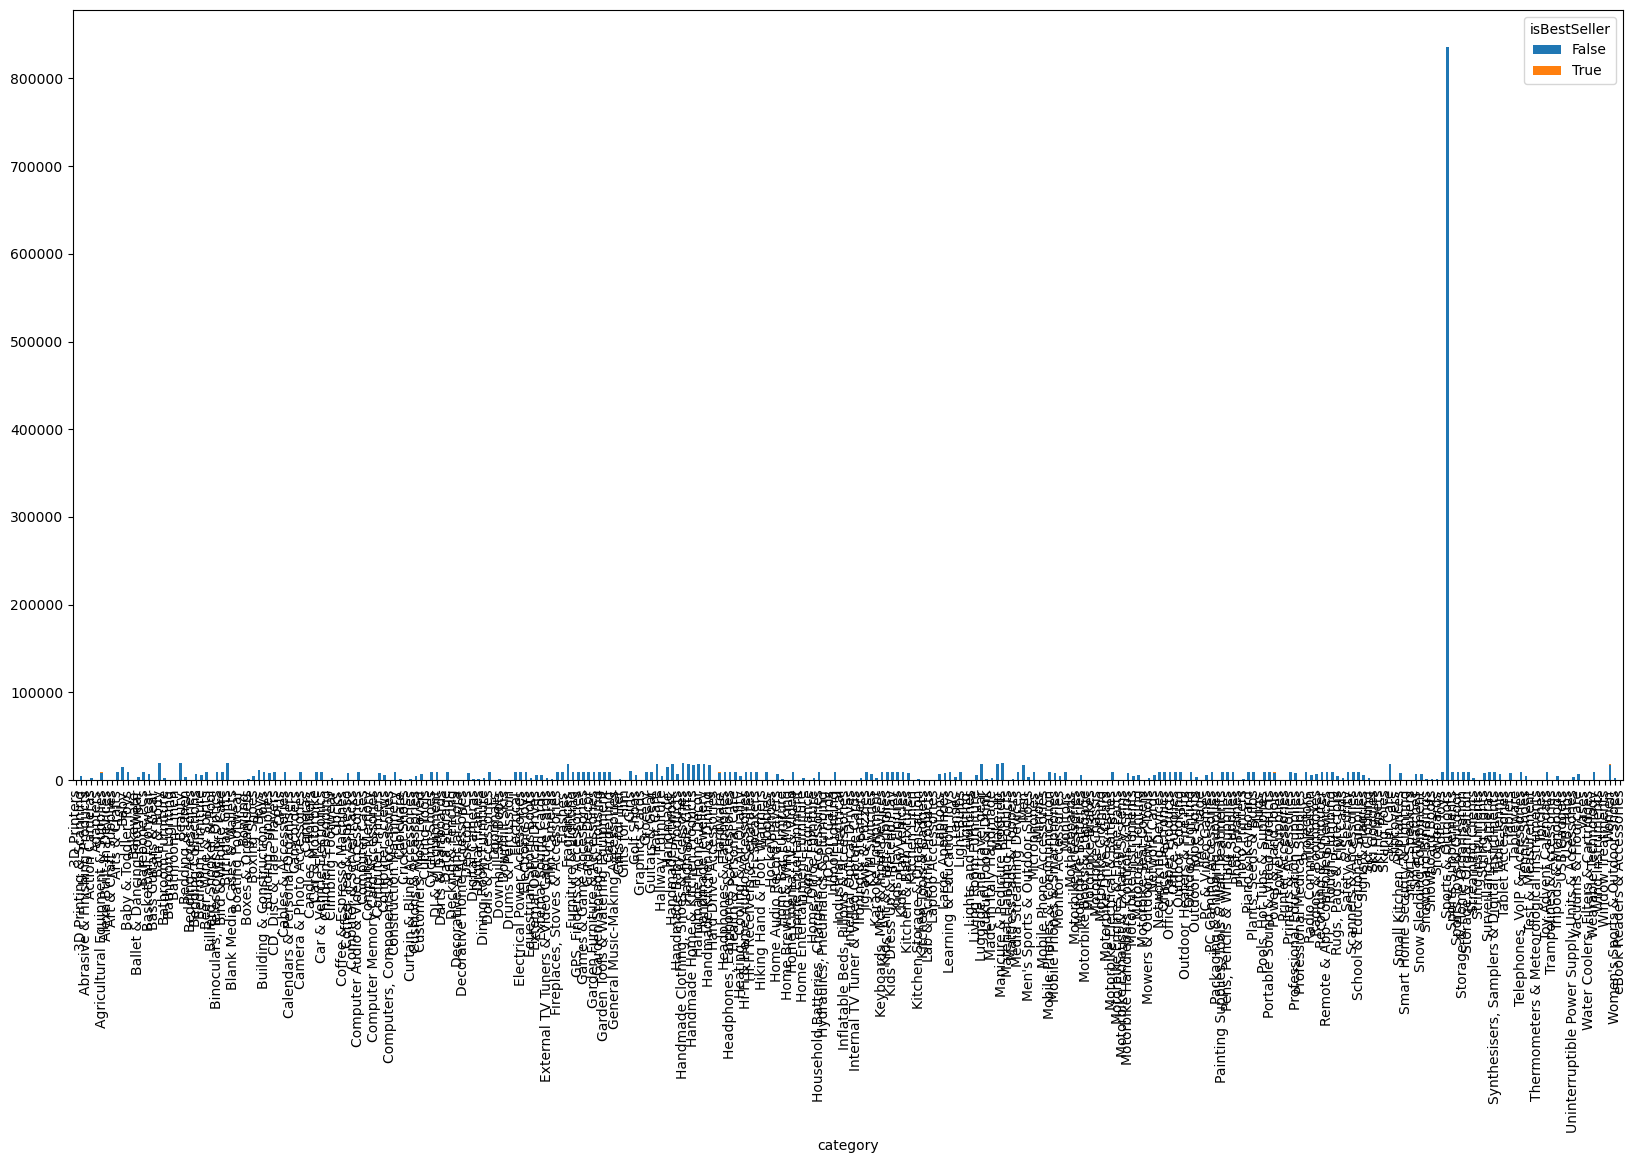

In [31]:
crosstab_result.plot(kind="bar", stacked=True, figsize=(20, 10));


## Exploring Product Prices and Ratings Across Categories and Brands


### Objective: Investigate how different product categories influence product prices.

In [60]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [62]:
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_filtered 

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [64]:
top_20_categories = df_filtered['category'].value_counts().nlargest(20).index
df_top_20 = df_filtered[df_filtered['category'].isin(top_20_categories)]
df_top_20

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


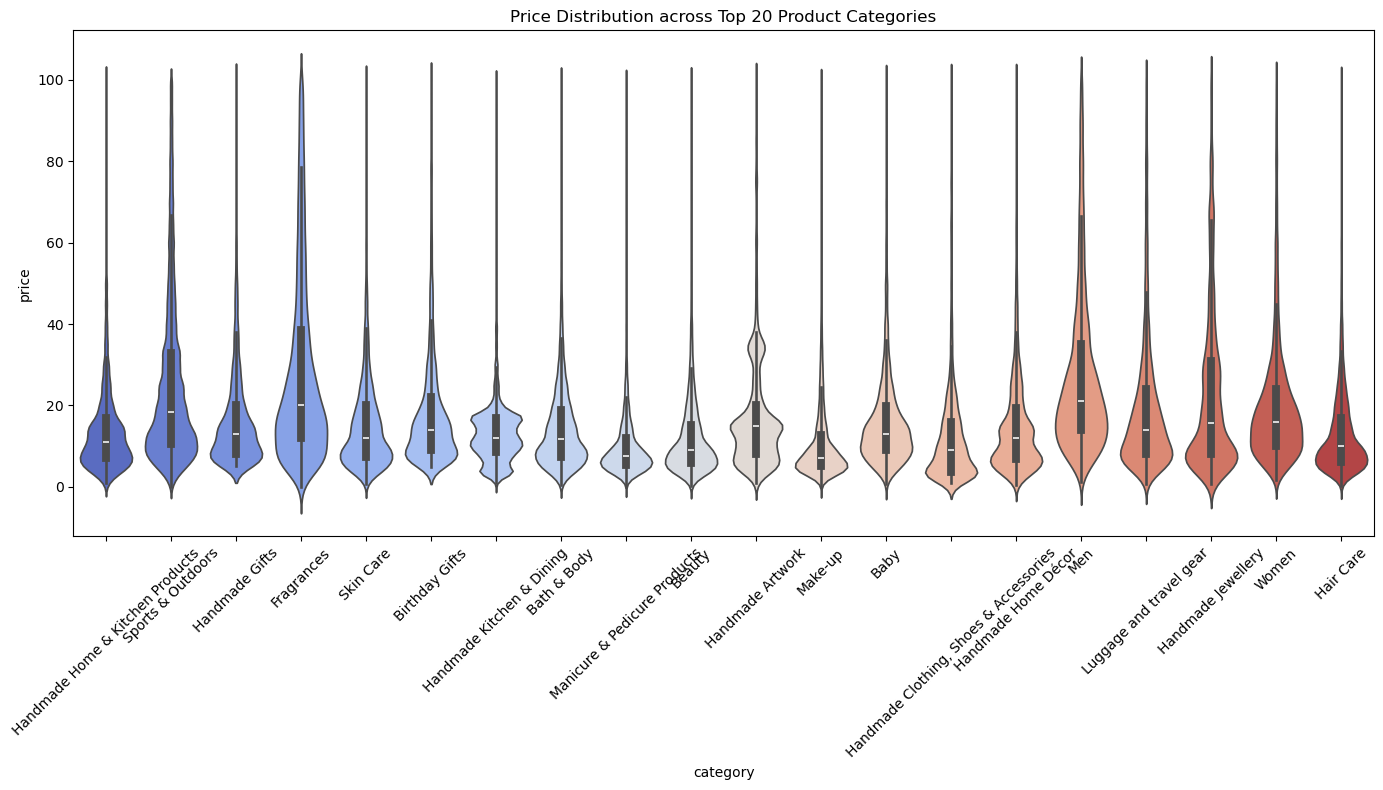

In [69]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top_20, x='category', y='price', palette="coolwarm", hue='category', legend=False)

plt.xticks(rotation=45) 
plt.title('Price Distribution across Top 20 Product Categories')
plt.tight_layout() 

plt.show()

In [ ]:
#Which product category tends to have the highest median price? Don't filter here by top categories.

In [70]:
median_prices_per_category = df.groupby('category')['price'].median()
median_prices_per_category

category
3D Printers                       319.00
3D Printing & Scanning             36.86
Abrasive & Finishing Products      10.49
Action Cameras                     60.77
Adapters                            7.05
                                   ...  
Wind Instruments                  126.79
Window Treatments                  17.99
Women                              16.49
Women's Sports & Outdoor Shoes     61.64
eBook Readers & Accessories        23.00
Name: price, Length: 296, dtype: float64

In [72]:
highest_median_price_category = median_prices_per_category.idxmax()
highest_median_price_category

'Laptops'

In [74]:
highest_median_value = median_prices_per_category.max()
highest_median_value

1042.725

In [75]:
print(f"The product category with the highest median price is '{highest_median_price_category}' with a median price of £{highest_median_value:.2f}.")

The product category with the highest median price is 'Laptops' with a median price of £1042.72.


In [76]:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).


In [83]:
top_10_categories = df['category'].value_counts().nlargest(10).index
top_10_categories

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances'],
      dtype='object', name='category')

In [84]:
#filter the DataFrame to include only the top 10 categories
df_top_10 = df[df['category'].isin(top_10_categories)]
df_top_10

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [85]:
# Calculate the average (mean) price for each of the top 10 categories
mean_prices_top_10 = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)
mean_prices_top_10

category
Sports & Outdoors                         125.769814
Fragrances                                 36.202865
Birthday Gifts                             26.585166
Handmade Clothing, Shoes & Accessories     16.865767
Skin Care                                  16.340926
Bath & Body                                15.042266
Hair Care                                  14.326030
Beauty                                     13.222322
Make-up                                    10.895356
Manicure & Pedicure Products               10.521108
Name: price, dtype: float64

Text(0.5, 1.0, 'Average Price of Products for the Top 10 Categories')

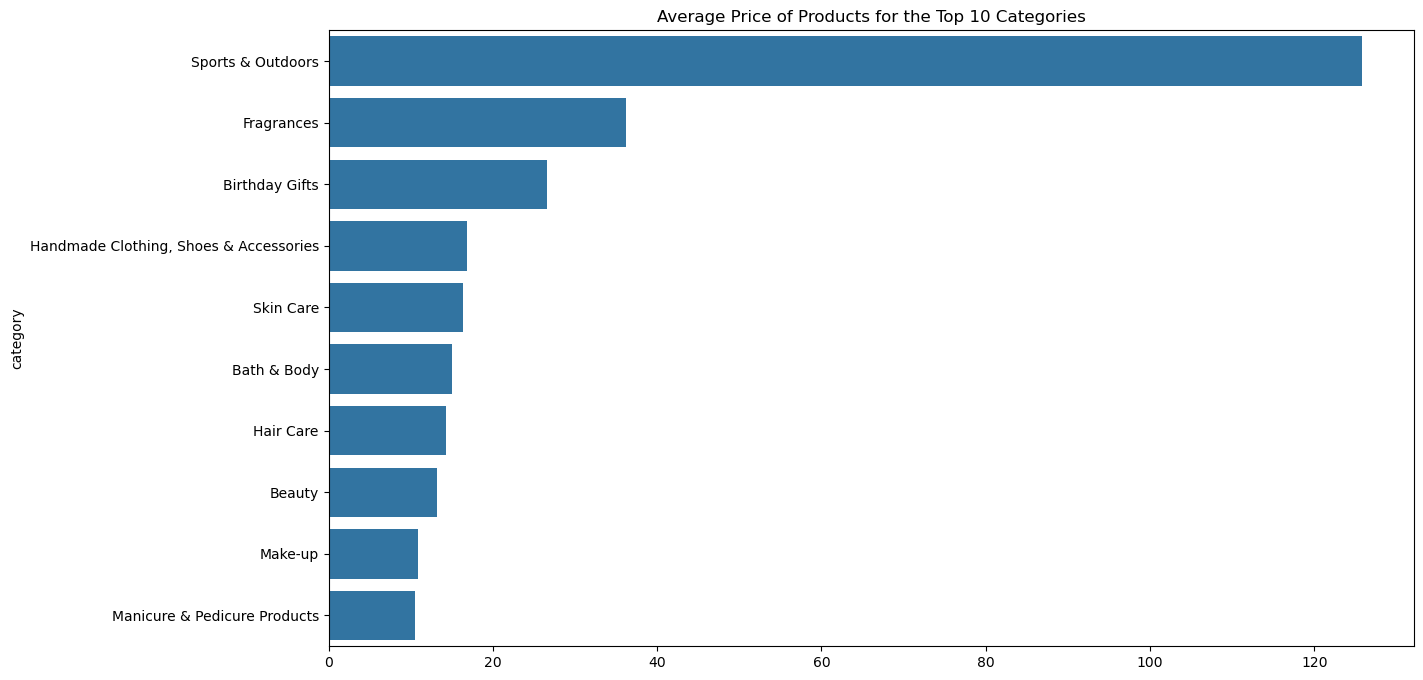

In [89]:
#bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=mean_prices_top_10.values, y=mean_prices_top_10.index)
plt.title('Average Price of Products for the Top 10 Categories')

In [92]:
#Which product category commands the highest average price? Don't filter here by top categories.


In [93]:
mean_prices_per_category = df.groupby('category')['price'].mean()

highest_average_price_category = mean_prices_per_category.idxmax()
highest_average_price_value = mean_prices_per_category.max()

print(f"The product category with the highest average price is '{highest_average_price_category}' with an average price of £{highest_average_price_value:.2f}.")

The product category with the highest average price is 'Laptops' with an average price of £1087.99.


In [99]:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. 
#Filter out the top 10 categories based on count for better visualization.

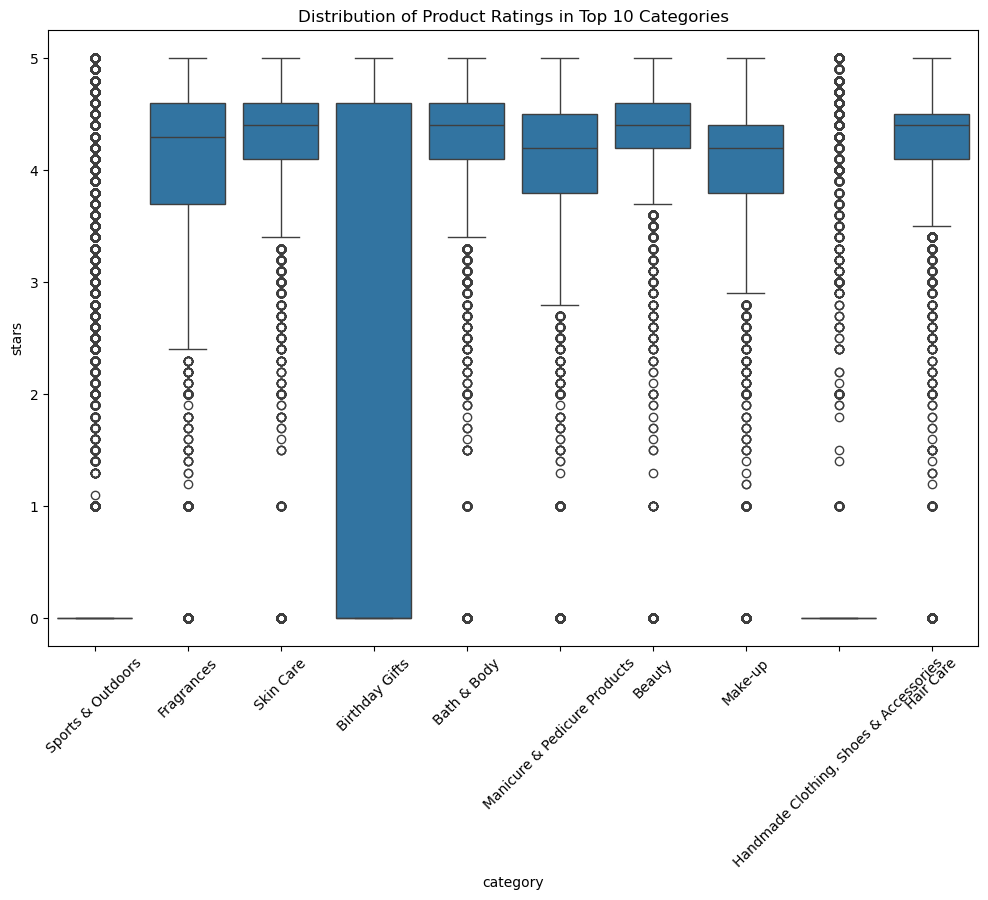

In [98]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10, x='category', y='stars')
plt.xticks(rotation=45) 
plt.title('Distribution of Product Ratings in Top 10 Categories')

plt.show()

In [100]:
median_ratings_per_category = df.groupby('category')['stars'].median()

highest_median_rating_category = median_ratings_per_category.idxmax()
highest_median_rating_value = median_ratings_per_category.max()

print(f"The product category with the highest median rating from customers is '{highest_median_rating_category}', with a median rating of {highest_median_rating_value}.")

The product category with the highest median rating from customers is 'Computer Memory', with a median rating of 4.7.


## Investigating the Interplay Between Product Prices and Ratings

### Analyze how product ratings (stars) correlate with product prices.

In [101]:
correlation_coefficient = df['price'].corr(df['stars'])

print(f"The correlation coefficient between price and stars is: {correlation_coefficient:.3f}")

The correlation coefficient between price and stars is: -0.125


In [102]:
from scipy.stats import pearsonr

correlation_coef, p_value = pearsonr(df['price'], df['stars'])

print(f"Correlation coefficient: {correlation_coef:.3f}")
print(f"P-value: {p_value:.3g}")

Correlation coefficient: -0.125
P-value: 0


Text(0.5, 1.0, 'Relationship Between Product Rating and Price')

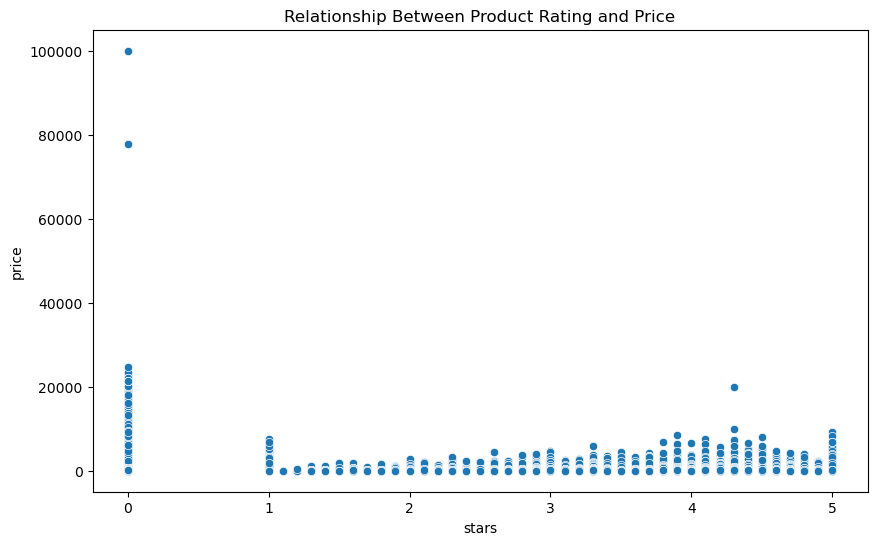

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stars', y='price')
plt.title('Relationship Between Product Rating and Price')


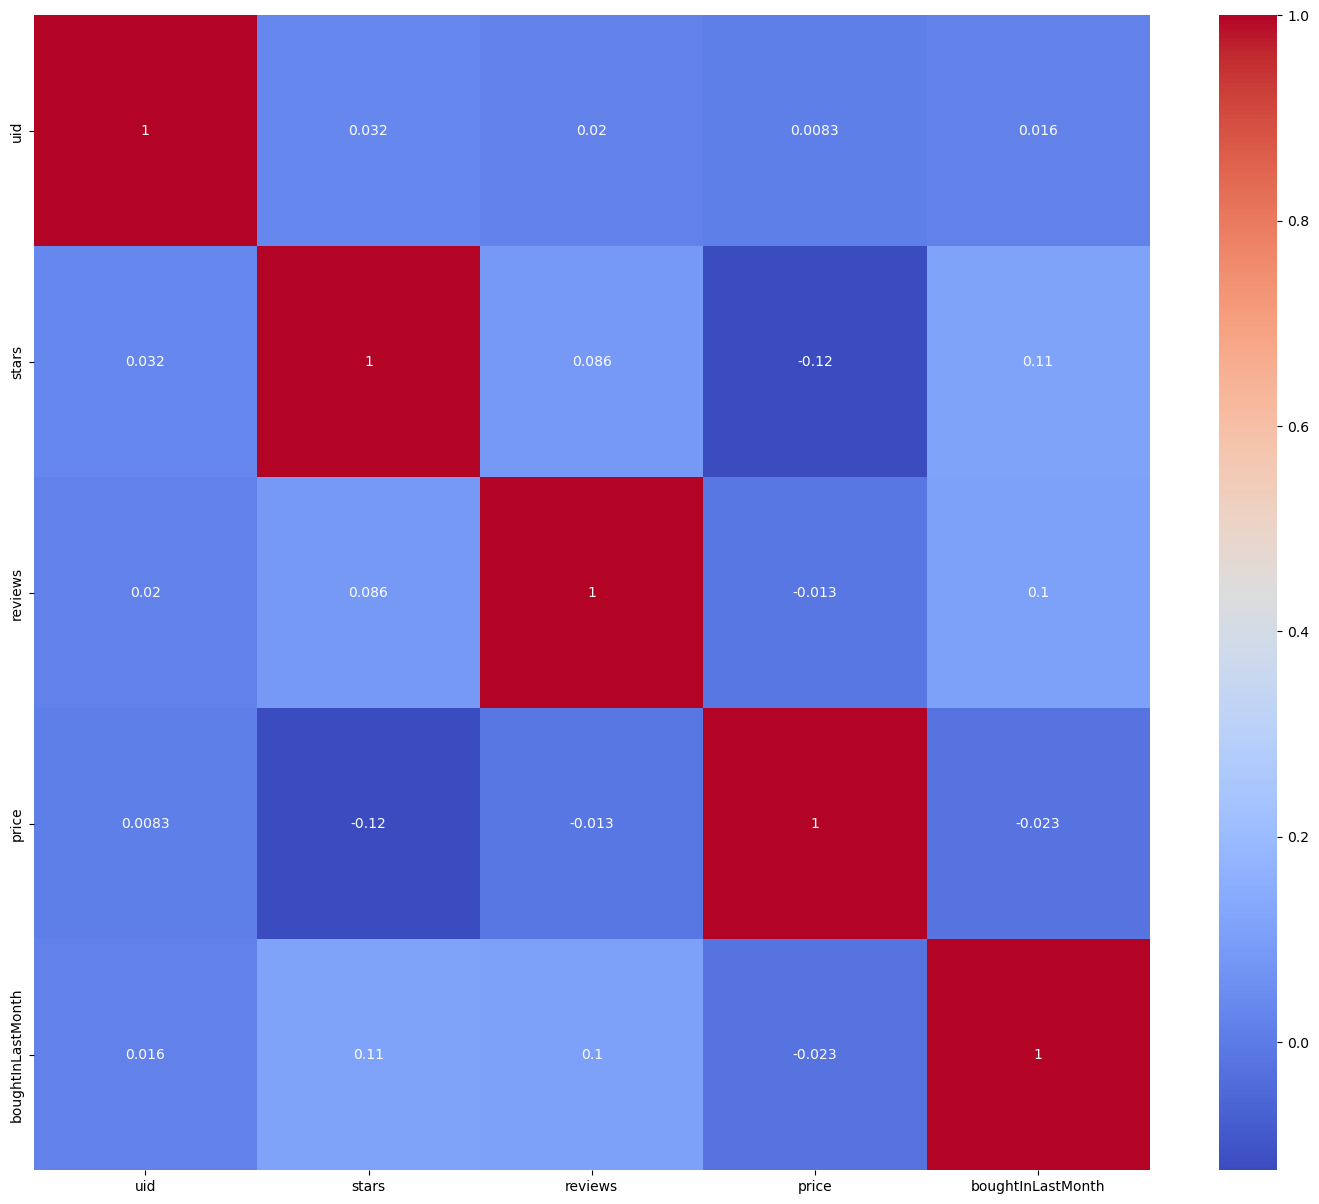

In [115]:
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])  # np.number covers both float and int

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(18, 15))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.show()

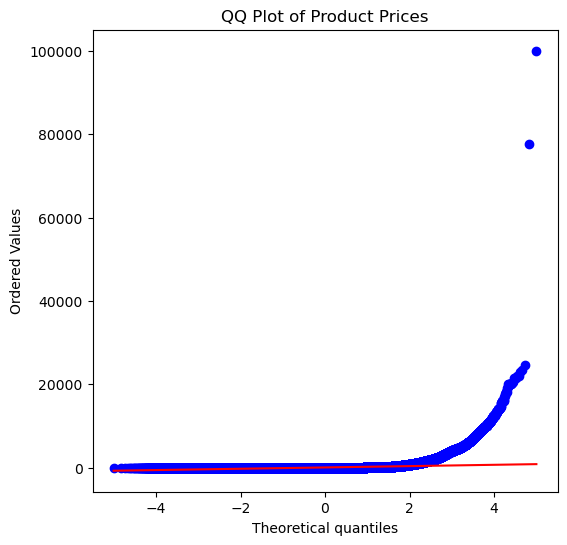

In [120]:
import scipy.stats as stats

prices = df['price'].dropna()  

# Generate QQ plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
stats.probplot(prices, dist="norm", plot=ax)

plt.title('QQ Plot of Product Prices')

plt.show()